In [0]:
import tensorflow as tf
import numpy as np

**Load the Data**

In [3]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


**Prepare Data**

In [0]:
num_classes=10
image_height=28
image_width=28
image_channels=1
class_names= ['T-shirt/top','Trouser','Pullover','Dress','Coat/jacket','Sandal','Shirt','Sneaker','Bag','Ankel boot']

In [5]:
# Shape the data using channels_last ordering
# num_samples*num_rows*num_columns*num_channels
x_train=x_train.reshape((x_train.shape[0],image_height,image_width,image_channels))
x_test=x_test.reshape((x_test.shape[0],image_height,image_width,image_channels))
x_test.shape

(10000, 28, 28, 1)

In [0]:
# scaling data in the range of [0.0,1.0]
x_train, x_test = x_train.astype("float64") / 255.0, x_test.astype("float64")/ 255.0

In [0]:
# Pad the data to 32x32 to use in Lenet network
x_train=np.pad(x_train,((0,0),(2,2),(2,2),(0,0)),mode='constant')
x_test=np.pad(x_test,((0,0),(2,2),(2,2),(0,0)),mode='constant')

In [8]:
# Display data_dimensions
print("x_train shape :",x_train.shape)
print("x_test shape :",x_test.shape)
print("y_train shape :",y_train.shape)
print("y_test shape :",y_test.shape)

x_train shape : (60000, 32, 32, 1)
x_test shape : (10000, 32, 32, 1)
y_train shape : (60000,)
y_test shape : (10000,)


In [0]:
# parameters for training data set
num_classes=10
image_height=32
image_width=32
image_channels=1

In [0]:
# import necessary packages
from tensorflow.keras import backend
from tensorflow.keras import layers
from tensorflow.keras import models

# define model as a class
class LeNet:
  # INPUT => CONV => TANH => AVG-POOL => CONV => TANH => AVG-POOL => FC => TANH => FC => TANH => FC => SOFTMAX
  @staticmethod
  def init(num_classes,image_height,image_width,image_channels,weightsPath=None):
    # if we are using channel first then update the shape
    if backend.image_data_format()=='channels_first':
      inputShape=(image_channels,image_height,image_width)
    else:
      inputShape=(image_height,image_width,image_channels)

    # initalize the model
    model=models.Sequential()

    # Define first set of CONV => ACTIVATION => POOL layers
    model.add(layers.Conv2D(filters=6,kernel_size=(5,5),strides=(1,1),padding='valid',activation=tf.nn.tanh,input_shape=inputShape))
    model.add(layers.AveragePooling2D(pool_size=(2,2),strides=(2,2)))

    # Define second set of CONV => ACTIVATION => POOL layers
    model.add(layers.Conv2D(filters=6,kernel_size=(5,5),strides=(1,1),padding='valid',activation=tf.nn.tanh))
    model.add(layers.AveragePooling2D(pool_size=(2,2),strides=(2,2)))

    # Flatten the convolution volume to fully connected layers
    model.add(layers.Flatten())

    # Define the first FC => ACTIVATION layers
    model.add(layers.Dense(units=120,activation=tf.nn.tanh))

    # Define the second FC => ACTIVATION layers
    model.add(layers.Dense(units=84,activation=tf.nn.tanh))

    # lastly define the softmax classifier
    model.add(layers.Dense(units=num_classes,activation=tf.nn.softmax))

    # if weights path is supplied (indicating that model was pre-trained), then load the weights
    if weightsPath is not None :
      model.load_weights(weightsPath)
    
    # return the constructed network architecture
    return model

**Compile Model**

In [11]:
# initialize the model
model=LeNet.init(num_classes=num_classes,image_height=image_height,image_width=image_width,image_channels=image_channels,weightsPath=None)

# compile the model
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=.01),        #Stochiostic Gradient Descent
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Model summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 6)         156       
_________________________________________________________________
average_pooling2d (AveragePo (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 6)         906       
_________________________________________________________________
average_pooling2d_1 (Average (None, 5, 5, 6)           0         
_________________________________________________________________
flatten (Flatten)            (None, 150)               0         
_________________________________________________________________
dense (Dense)                (None, 120)               18120     
_________________________________________________________________
dense_1 (Dense)              (None, 84)                1

In [12]:
# Define callback function for training termination criteria
# accuracy_cutoff=.99

class myCallback(tf.keras.callbacks.Callback):
      def on_epoch_end(self, epoch, logs=None):
        if(logs.get('accuracy')>0.99):
          print("\nReached 99% accuracy so cancelling training!")
          self.model.stop_training = True

# initialize training configuration
batch_size=128
epochs=100

# run training
history = model.fit(x=x_train, y=y_train, validation_data=(x_test,y_test), epochs=epochs, batch_size=batch_size, callbacks=[myCallback()], verbose=1)

Epoch 1/100
469/469 [==============================] - 3s 6ms/step - loss: 1.3074 - accuracy: 0.6046 - val_loss: 0.9111 - val_accuracy: 0.6925
Epoch 2/100
469/469 [==============================] - 3s 6ms/step - loss: 0.8024 - accuracy: 0.7197 - val_loss: 0.7496 - val_accuracy: 0.7265
Epoch 3/100
469/469 [==============================] - 3s 6ms/step - loss: 0.6909 - accuracy: 0.7494 - val_loss: 0.6778 - val_accuracy: 0.7493
Epoch 4/100
469/469 [==============================] - 3s 6ms/step - loss: 0.6324 - accuracy: 0.7680 - val_loss: 0.6319 - val_accuracy: 0.7657
Epoch 5/100
469/469 [==============================] - 3s 6ms/step - loss: 0.5926 - accuracy: 0.7846 - val_loss: 0.5979 - val_accuracy: 0.7811
Epoch 6/100
469/469 [==============================] - 3s 6ms/step - loss: 0.5622 - accuracy: 0.7963 - val_loss: 0.5730 - val_accuracy: 0.7925
Epoch 7/100
469/469 [==============================] - 3s 6ms/step - loss: 0.5383 - accuracy: 0.8058 - val_loss: 0.5530 - val_accuracy: 0.7985

**Evaluating Training Performance**

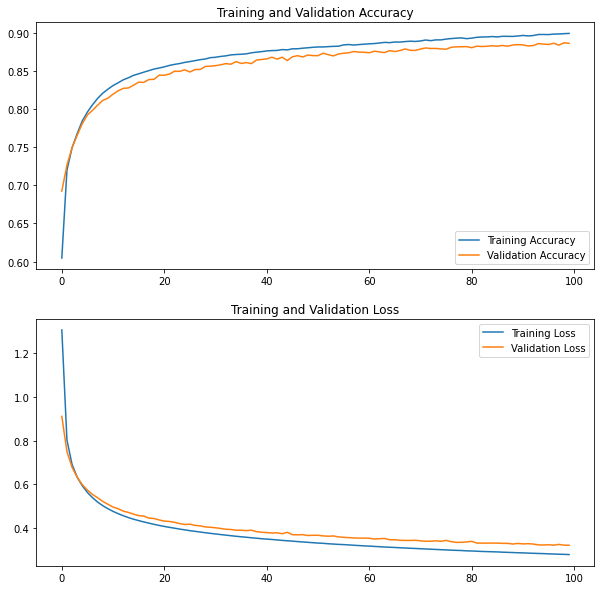

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(10, 10))
plt.subplot(2, 1, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [14]:
# show accuracy on testing set
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=1, batch_size=batch_size)
print("test accuracy : {:.2f}%".format(test_acc*100))

79/79 [==============================] - 0s 3ms/step - loss: 0.3203 - accuracy: 0.8864
test accuracy : 88.64%


In [0]:
model.save_weights("/usr/LeNet",overwrite=True)

**Evaluate Pre-trained Model**

In [16]:
# init model and load the model weights
# initialize the model
model=LeNet.init(num_classes=num_classes,image_height=image_height,image_width=image_width,image_channels=image_channels,weightsPath="/usr/LeNet")

# compile the model
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=.01),        #Stochiostic Gradient Descent
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Model summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 28, 28, 6)         156       
_________________________________________________________________
average_pooling2d_2 (Average (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 10, 10, 6)         906       
_________________________________________________________________
average_pooling2d_3 (Average (None, 5, 5, 6)           0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 150)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 120)               18120     
_________________________________________________________________
dense_4 (Dense)              (None, 84)               

In [17]:
# show accuracy on testing set
batch_size=128
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=1, batch_size=batch_size)
print("test accuracy : {:.2f}%".format(test_acc*100))

79/79 [==============================] - 0s 3ms/step - loss: 0.3203 - accuracy: 0.8864
test accuracy : 88.64%


**Model Predictions**

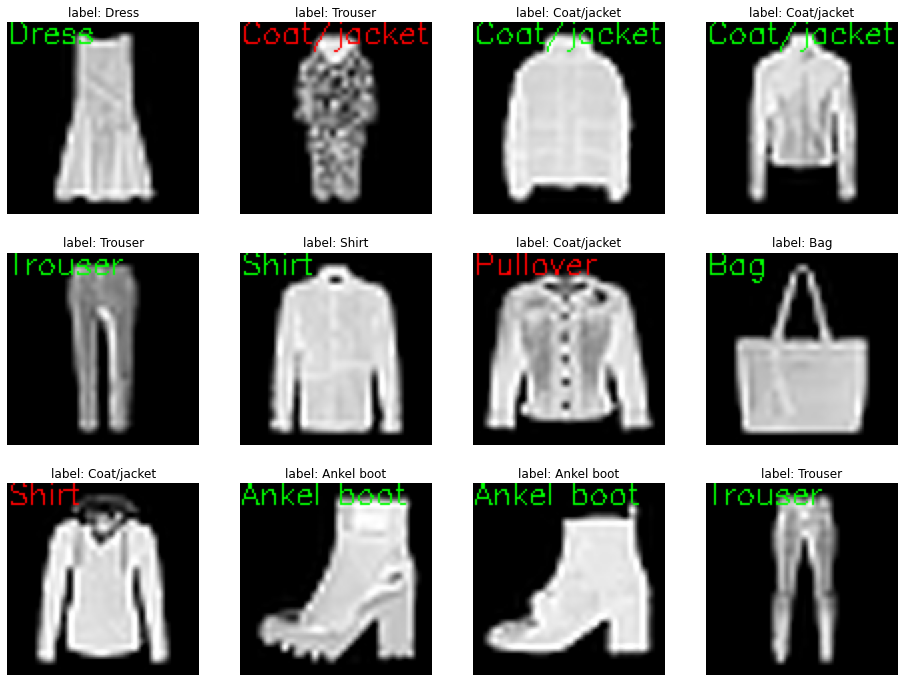

In [21]:
%matplotlib inline
import numpy as np
import cv2
import matplotlib.pyplot as plt

# set up matplotlib figure and size it to fit 3*4 pics
nrows= 3
ncolumns= 4
fig = plt.gcf()
fig.set_size_inches(ncolumns*4,nrows*4)

# Randomly select few testing digits
num_predictions=12
test_indices=np.random.choice(np.arange(0,len(y_test)),size=(num_predictions,))
test_images=np.stack([x_test[i] for i in test_indices])     #not understood how it is printed based on shape
test_labels=np.stack([y_test[i] for i in test_indices])     #and not understood how it is stacked

# # compute predictions
predictions=model.predict(test_images)

for i in range(num_predictions):
  # select the most probable class
  prediction=np.argmax(predictions[i])

  # rescale the test image
  image=(test_images[i]*255).astype("uint8")
  
  # resize the image from 28x28 to 96x96 so that we can see it better
  image=cv2.resize(image,(96,96),interpolation=cv2.INTER_CUBIC)      # INTER_CUBIC – a bicubic interpolation over 4×4 pixel neighborhood 
                                                                     #how 32*32*1 is converted to 96*96  

  # convert gray scale image to RGB color
  image=cv2.merge([image]*3)

  # select prediction text color 
  if prediction == test_labels[i]:
    rgb_color = (0, 255, 0)    #green for correct predictions
  else:
    rgb_color = (255, 0, 0)    #red for wrong predictions
  
  # show the image and prediction
  cv2.putText(image, str(class_names[prediction]), (0,10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, rgb_color, 1)

  # set up subplot, subplot indices start at 1
  sp = plt.subplot(nrows, ncolumns, i+1, title="label: %s" %class_names[test_labels[i]])
  sp.axis("Off")  #don't show axes(or gridlines)
  plt.imshow(image)                                                 #not understood difference between plt.imshow() and plt.show()

# show figure matrix
plt.show()



